In [7]:
# IMPORTING LIBRARIES
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import warnings
warnings.filterwarnings('ignore')

In [8]:
# LOADING DATASETS
product_df = pd.read_csv('product_info.csv')
review_df_01 = pd.read_csv('reviews_0-250.csv', index_col = 0, dtype={'author_id':'str'})
review_df_02 = pd.read_csv('reviews_250-500.csv', index_col = 0, dtype={'author_id':'str'})
review_df_03 = pd.read_csv('reviews_500-750.csv', index_col = 0, dtype={'author_id':'str'})
review_df_04 = pd.read_csv('reviews_750-1250.csv', index_col = 0, dtype={'author_id':'str'})
review_df_05 = pd.read_csv('reviews_1250-end.csv', index_col = 0, dtype={'author_id':'str'})

In [9]:
# MERGIG ALL REVIEWS DATAFRAMES
review_df = pd.concat([review_df_01, review_df_02, review_df_03, review_df_04, review_df_05], axis=0)


In [10]:
# PRINTING SHAPES OF DATAFRAMES
print("Shape of review dataframe: ",review_df.shape)
print("Shape of product dataframe: ",product_df.shape)

Shape of review dataframe:  (720758, 18)
Shape of product dataframe:  (8494, 27)


In [11]:
# CHECKING COLUMNS THAT ARE COMMON IN BOTH DATAFRAMES
cols_to_use = product_df.columns.difference(review_df.columns)
cols_to_use = list(cols_to_use)
cols_to_use.append('product_id')
print(cols_to_use)

['brand_id', 'child_count', 'child_max_price', 'child_min_price', 'highlights', 'ingredients', 'limited_edition', 'loves_count', 'new', 'online_only', 'out_of_stock', 'primary_category', 'reviews', 'sale_price_usd', 'secondary_category', 'sephora_exclusive', 'size', 'tertiary_category', 'value_price_usd', 'variation_desc', 'variation_type', 'variation_value', 'product_id']


In [12]:
# AS DATAFRAMES HAVE COMMON COLUMN 'product_id', WE CAN MERGE THEM ON 'product_id'
df = pd.merge(review_df, product_df[cols_to_use], how='outer', on=['product_id', 'product_id'])

In [14]:
# LOOKING AT THE SHAPE OF DATAFRAME
print("Shape of final dataframe: ",df.shape)

Shape of final dataframe:  (300000, 40)


In [15]:
# LOOKING AT THE FIRST FEW ROWS OF DATAFRAME
df.head(25)

,author_id,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,review_title,...,reviews,sale_price_usd,secondary_category,sephora_exclusive,size,tertiary_category,value_price_usd,variation_desc,variation_type,variation_value
0,1741593524,5.0,1.0,1.000000,2.0,0.0,2.0,2023-02-01,I use this with the Nudestix “Citrus Clean Bal...,Taught me how to double cleanse!,...,1.0,NaN,Cleansers,0.0,2.4 oz / 70 ml,NaN,NaN,NaN,Size,2.4 oz / 70 ml
1,31423088263,1.0,0.0,NaN,0.0,0.0,0.0,2023-03-21,I bought this lip mask after reading the revie...,Disappointed,...,16118.0,NaN,Lip Balms & Treatments,1.0,0.7 oz/ 20 g,NaN,NaN,NaN,Color,Original
2,5061282401,5.0,1.0,NaN,0.0,0.0,0.0,2023-03-21,My review title says it all! I get so excited ...,New Favorite Routine,...,16118.0,NaN,Lip Balms & Treatments,1.0,0.7 oz/ 20 g,NaN,NaN,NaN,Color,Original
3,6083038851,5.0,1.0,NaN,0.0,0.0,0.0,2023-03-20,I’ve always loved this formula for a long time...,Can't go wrong with any of them,...,16118.0,NaN,Lip Balms & Treatments,1.0,0.7 oz/ 20 g,NaN,NaN,NaN,Color,Original
4,47056667835,5.0,1.0,NaN,0.0,0.0,0.0,2023-03-20,"If you have dry cracked lips, this is a must h...",A must have !!!,...,16118.0,NaN,Lip Balms & Treatments,1.0,0.7 oz/ 20 g,NaN,NaN,NaN,Color,Original
5,42802569154,4.0,1.0,1.000000,1.0,0.0,1.0,2023-03-19,The scent isn’t my favourite but it works grea...,Great!,...,16118.0,NaN,Lip Balms & Treatments,1.0,0.7 oz/ 20 g,NaN,NaN,NaN,Color,Original
6,6941883808,2.0,0.0,0.250000,8.0,6.0,2.0,2023-03-19,I’ll give this 2 stars for nice packaging and ...,Dried my lips out and clogged my pores,...,16118.0,NaN,Lip Balms & Treatments,1.0,0.7 oz/ 20 g,NaN,NaN,NaN,Color,Original
7,27926227988,5.0,1.0,NaN,0.0,0.0,0.0,2023-03-19,I use this at night or while I’m putting makeu...,Works great,...,16118.0,NaN,Lip Balms & Treatments,1.0,0.7 oz/ 20 g,NaN,NaN,NaN,Color,Original
8,7656791726,5.0,1.0,1.000000,1.0,0.0,1.0,2023-03-18,I love this stuff. I first had the sample size...,Must have.,...,16118.0,NaN,Lip Balms & Treatments,1.0,0.7 oz/ 20 g,NaN,NaN,NaN,Color,Original
9,38727834382,5.0,1.0,1.000000,2.0,0.0,2.0,2023-03-18,I purchased the Sweet Candy scent at my local ...,RUN TO PURCHASE,...,16118.0,NaN,Lip Balms & Treatments,1.0,0.7 oz/ 20 g,NaN,NaN,NaN,Color,Original


In [16]:
# HANDLING MISSING VALUES
missing = []
unique = []
types = []
variables = []
count = []

for item in df.columns:
    variables.append(item)
    missing.append(df[item].isnull().sum())
    unique.append(df[item].nunique())
    types.append(df[item].dtypes)
    count.append(len(df[item]))

output = pd.DataFrame({
    'variable': variables,
    'dtype': types,
    'count': count,
    'unique': unique,
    'missing': missing,

})
print("Df info : ")
output.sort_values("missing",ascending=False).reset_index(drop=True)

Df info : 


,variable,dtype,count,unique,missing
0,variation_desc,object,300000,0,300000
1,sale_price_usd,float64,300000,1,299031
2,value_price_usd,float64,300000,3,281017
3,helpfulness,float64,300000,1511,165319
4,child_max_price,float64,300000,37,107699
5,child_min_price,float64,300000,24,107699
6,review_title,object,300000,105943,83473
7,eye_color,object,300000,6,71914
8,hair_color,object,300000,7,71528
9,tertiary_category,object,300000,18,68611


**DROPPING COLUMNS**

In the dataset, there few of columns that have a lot missing values, so we are going to drop those columns.


In [17]:
# DROP COLUMNS
cols = """variation_desc
sale_price_usd
value_price_usd
child_max_price
child_min_price
review_title"""
cols_list = cols.split("\n")
df.drop(columns=cols_list,axis=1,inplace=True)

In [18]:
# DROP ROWS WITH MISSING VALUES
df.dropna(axis=0,inplace=True)

In [19]:
# DESCRIBING DATAFRAME
df.describe()

,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,price_usd,brand_id,child_count,limited_edition,loves_count,new,online_only,out_of_stock,reviews,sephora_exclusive
count,69905.000000,69905.000000,69905.000000,69905.000000,69905.000000,69905.000000,69905.000000,69905.000000,69905.000000,69905.000000,69905.000000,69905.0,69905.000000,69905.000000,69905.000000,69905.000000
mean,4.059795,0.767742,0.780719,8.658451,1.837522,6.820928,44.643449,6090.067878,1.225950,0.063086,255225.343323,0.0,0.040441,0.001044,3864.899607,0.409012
std,1.381144,0.422276,0.310097,39.074042,8.159855,33.692918,27.312592,1064.425576,1.082052,0.243119,215430.255753,0.0,0.196992,0.032299,2111.077896,0.491655
min,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,6.000000,1254.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,966.000000,0.000000
25%,3.000000,1.000000,0.666667,2.000000,0.000000,1.000000,24.000000,6014.000000,0.000000,0.000000,73112.000000,0.0,0.000000,0.000000,1128.000000,0.000000
50%,5.000000,1.000000,0.970588,3.000000,1.000000,3.000000,39.000000,6207.000000,1.000000,0.000000,234295.000000,0.0,0.000000,0.000000,4168.000000,0.000000
75%,5.000000,1.000000,1.000000,8.000000,1.000000,6.000000,65.000000,6236.000000,2.000000,0.000000,403801.000000,0.0,0.000000,0.000000,5778.000000,1.000000
max,5.000000,1.000000,1.000000,3851.000000,548.000000,3481.000000,122.000000,8008.000000,5.000000,1.000000,763168.000000,0.0,1.000000,1.000000,8733.000000,1.000000


In [20]:
# UPDATED SHAPE OF DATAFRAME
df.shape

(69905, 34)

**EDA - EXPLORATORY DATA ANALYSIS**

In this section, I will perform an exploratory data analysis (EDA) on the dataset. The goal of EDA is to gain insights and understanding of the dataset, identify patterns, relationships, and anomalies. Through EDA, we can make informed decisions on how to preprocess and model the data, as well as generate hypotheses for further analysis.


In [21]:
# TRANSFORMING DATE COLUMNS
df['submission_time'] = pd.to_datetime(df['submission_time'])

df['year']= df['submission_time'].dt.year

df['month']= df['submission_time'].dt.month

df['day']= df['submission_time'].dt.day

df['weekday']= df['submission_time'].dt.weekday

dw_mapping={
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}

df['dayofweek']= df['submission_time'].dt.weekday.map(dw_mapping)

In [22]:
df

,author_id,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,skin_tone,...,sephora_exclusive,size,tertiary_category,variation_type,variation_value,year,month,day,weekday,dayofweek
16140,31124221503,5.0,1.0,1.000000,1.0,0.0,1.0,2023-03-19,"Makeup remover, gentle cleanser, and all aroun...",fair,...,0.0,5 oz/ 150 mL,Face Wash & Cleansers,Size,5 oz/ 150 mL,2023,3,19,6,Sunday
16142,5182718480,1.0,0.0,0.000000,2.0,2.0,0.0,2023-03-10,I wanted to love this so bad because it felt s...,mediumTan,...,0.0,5 oz/ 150 mL,Face Wash & Cleansers,Size,5 oz/ 150 mL,2023,3,10,4,Friday
16144,27905619860,5.0,1.0,1.000000,2.0,0.0,2.0,2023-03-09,Best facial cleanser I have used! I heard grea...,light,...,0.0,5 oz/ 150 mL,Face Wash & Cleansers,Size,5 oz/ 150 mL,2023,3,9,3,Thursday
16146,10601781306,1.0,0.0,0.000000,1.0,1.0,0.0,2023-03-06,The smell is like roses and I don’t feel I get...,light,...,0.0,5 oz/ 150 mL,Face Wash & Cleansers,Size,5 oz/ 150 mL,2023,3,6,0,Monday
16147,7079500845,1.0,0.0,0.833333,6.0,1.0,5.0,2023-02-28,"IM SO SAD! After 3 days of using this, my face...",fair,...,0.0,5 oz/ 150 mL,Face Wash & Cleansers,Size,5 oz/ 150 mL,2023,2,28,1,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,6637551158,4.0,1.0,1.000000,3.0,0.0,3.0,2020-02-23,This product is vegan and full of lots of yumm...,medium,...,1.0,1.01 oz / 30 mL,Face Serums,Size,1.01 oz / 30 mL,2020,2,23,6,Sunday
299996,6982464914,5.0,1.0,0.500000,2.0,1.0,1.0,2020-02-22,I wanted to wait to write the review and after...,lightMedium,...,1.0,1.01 oz / 30 mL,Face Serums,Size,1.01 oz / 30 mL,2020,2,22,5,Saturday
299997,1297245399,5.0,1.0,1.000000,3.0,0.0,3.0,2020-02-22,This serum is amazing! It’s gentle yet effecti...,light,...,1.0,1.01 oz / 30 mL,Face Serums,Size,1.01 oz / 30 mL,2020,2,22,5,Saturday
299998,1263592344,4.0,1.0,0.750000,4.0,1.0,3.0,2020-02-22,I was really surprised how much I ended up lik...,lightMedium,...,1.0,1.01 oz / 30 mL,Face Serums,Size,1.01 oz / 30 mL,2020,2,22,5,Saturday


In [23]:
from matplotlib.ticker import NullFormatter
import matplotlib as mpl
mpl.style.use(['ggplot'])
def hundformatter(x, pos):
    return str(round(x / 1e4, 1))

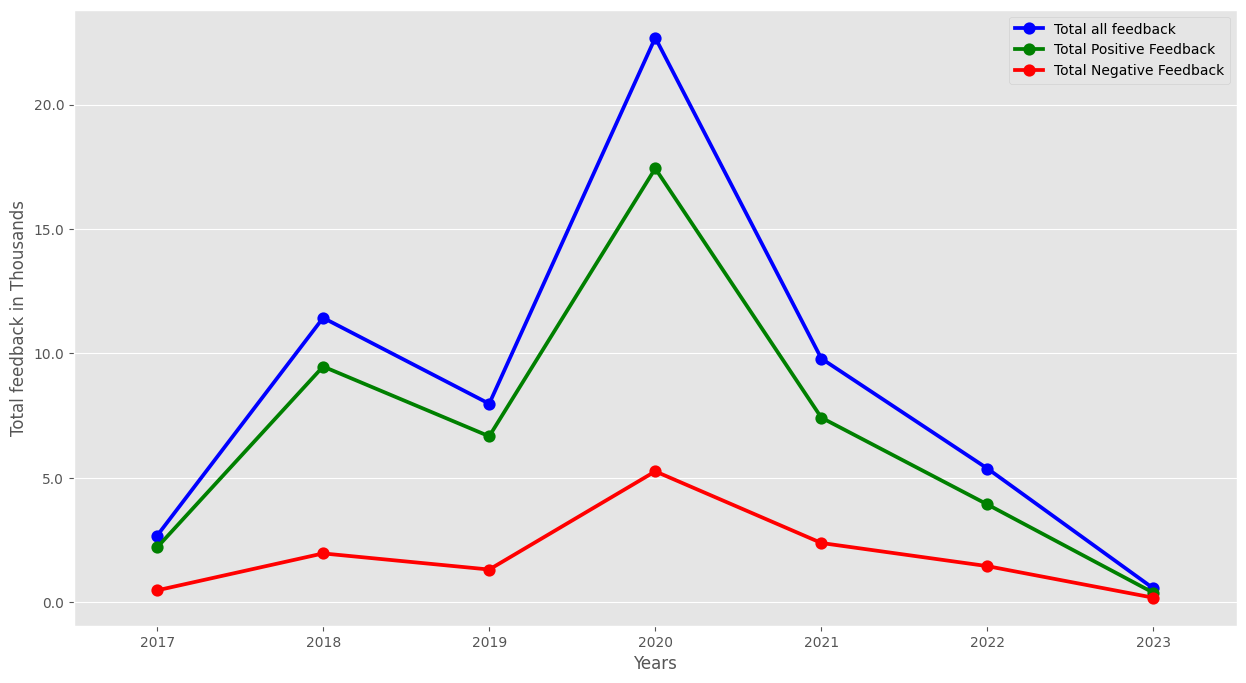

In [ ]:
# PLOTTING TOTAL FEEDBACK COUNT BY YEAR
fig, (ax1) = plt.subplots(nrows=1,ncols=1,figsize= (15,8))
total_feedback = df.groupby('year').sum(numeric_only=True)['total_feedback_count'].reset_index()

sns.pointplot(total_feedback,x='year',y='total_feedback_count', color="blue", label="Total all feedback",ax=ax1)

total_pos_feedback = df.groupby('year').sum(numeric_only=True)['total_pos_feedback_count'].reset_index()
sns.pointplot(total_pos_feedback,x='year',y='total_pos_feedback_count', color="green", label="Total Positive Feedback",ax=ax1)

total_neg_feedback = df.groupby('year').sum(numeric_only=True)['total_neg_feedback_count'].reset_index()
sns.pointplot(total_neg_feedback,x='year',y='total_neg_feedback_count', color="red", label="Total Negative Feedback",ax=ax1)

ax1.yaxis.set_major_formatter(hundformatter)
ax1.set_ylabel("Total feedback in Thousands")
ax1.set_xlabel("Years")
ax1.legend()

The graph shows the trend of total feedback (including all feedback, positive feedback, and negative feedback) over the years from 2017 to 2023. Here are the key insights:

1. **Peak in 2020**: The total feedback, along with positive and negative feedback, peaked in 2020. This suggests that there was a significant increase in engagement or product reviews during that year.

2. **Decline Post-2020**: After 2020, there is a noticeable decline in all types of feedback, with the sharpest drop occurring between 2020 and 2021. This decline continues through 2023, indicating reduced engagement or fewer reviews in recent years.

3. **Positive vs. Negative Feedback**: Throughout the years, positive feedback is consistently higher than negative feedback. However, both types of feedback follow a similar trend, with peaks in 2020 and subsequent declines.

4. **Low Negative Feedback**: Negative feedback remains relatively low across all years compared to positive feedback, indicating a generally favorable perception of the products being reviewed.

This trend could be indicative of external factors affecting customer engagement, such as changes in product popularity, market conditions, or broader global events like the COVID-19 pandemic, which likely influenced the peak in 2020.

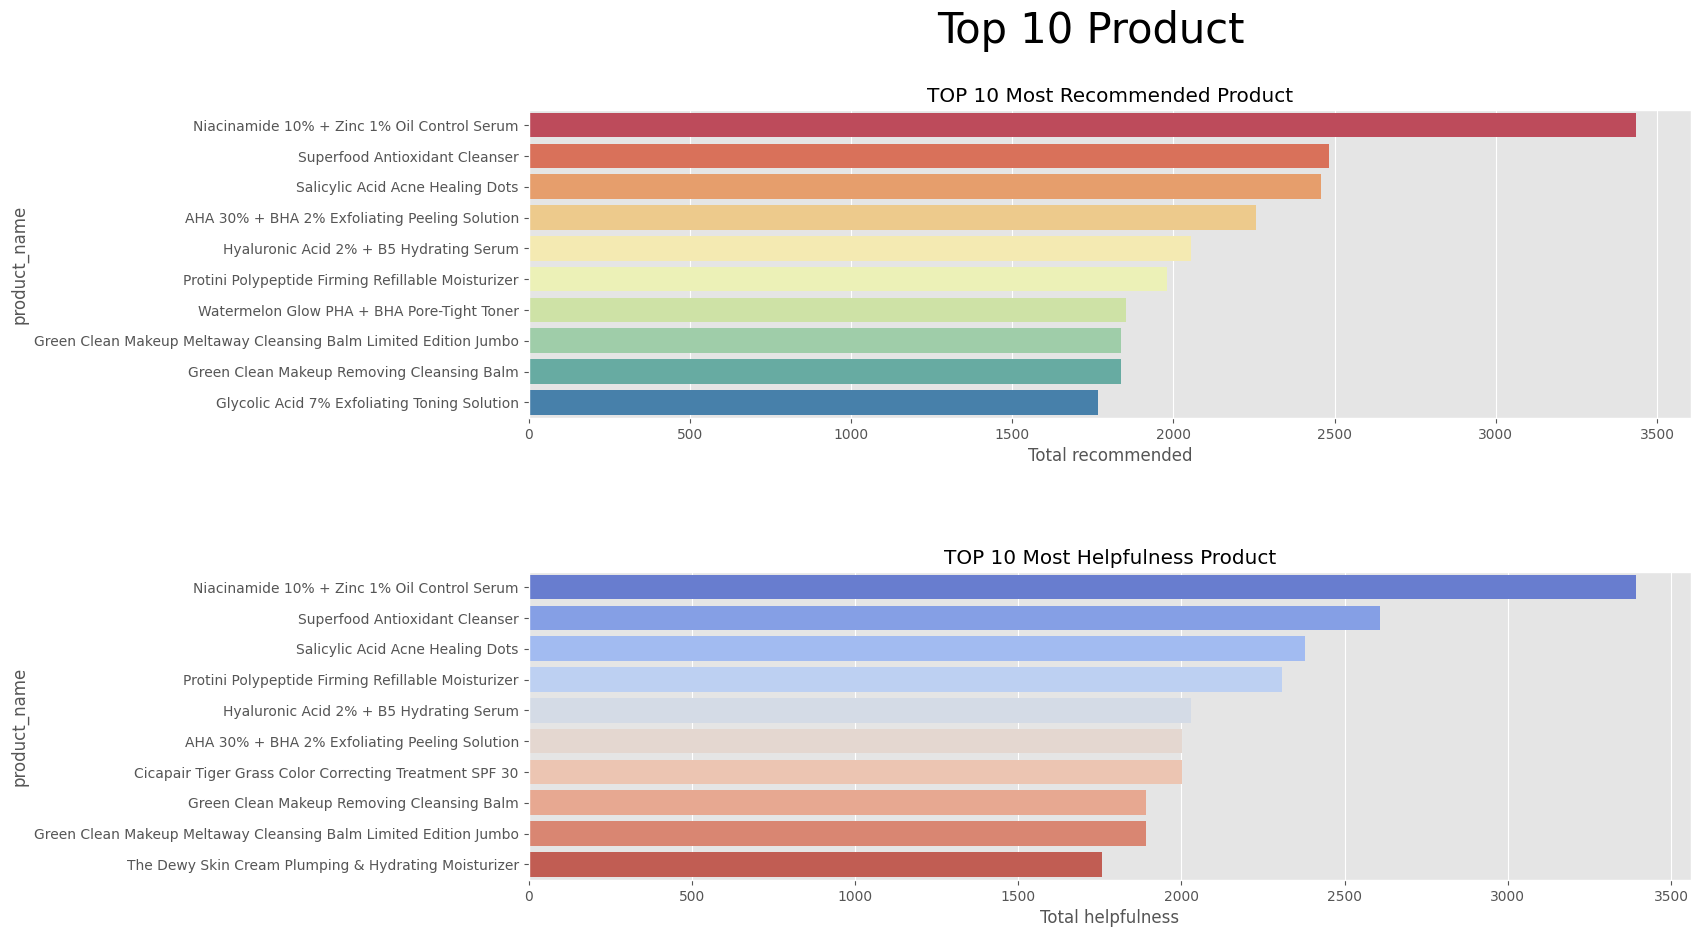

In [ ]:
# PLOTTING TOP 10 PRODUCTS
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(15, 10))
fig.subplots_adjust(hspace=0.5)

# Most recommended products
most_reccomended = df.groupby(['product_id', 'product_name', 'brand_name']).sum(numeric_only=True)['is_recommended'].reset_index() \
    .sort_values('is_recommended', ascending=False).head(10)
sns.barplot(data=most_reccomended, x='is_recommended', y='product_name', ax=ax1, hue='product_name', palette='Spectral', legend=False)
ax1.set_title("TOP 10 Most Recommended Product")
ax1.set_xlabel("Total recommended")

# Most helpfulness products
most_helpfulness = df.groupby(['product_id', 'product_name', 'brand_name']).sum(numeric_only=True)['helpfulness'].reset_index() \
    .sort_values('helpfulness', ascending=False).head(10)
sns.barplot(data=most_helpfulness, x='helpfulness', y='product_name', ax=ax2, hue='product_name', palette='coolwarm', legend=False)
ax2.set_title("TOP 10 Most Helpfulness Product")
ax2.set_xlabel("Total helpfulness")

# Overall title
plt.suptitle("Top 10 Product", fontsize=30)

# Show the plot
plt.show()


The graph presents the top 10 products based on two criteria: the most recommended products and the most helpfulness products.

### Insights:
1. **Most Recommended Product**:
   - The "Niacinamide 10% + Zinc 1% Oil Control Serum" is the most recommended product by a significant margin, surpassing others in terms of recommendations.
   - Other highly recommended products include the "Superfood Antioxidant Cleanser" and "Salicylic Acid Acne Healing Dots," which also perform well but fall behind the leading serum.

2. **Most Helpful Product**:
   - The same "Niacinamide 10% + Zinc 1% Oil Control Serum" also ranks as the most helpful product, indicating strong user satisfaction and utility.
   - The "Superfood Antioxidant Cleanser" and "Salicylic Acid Acne Healing Dots" follow closely, mirroring their standing in the recommendations chart.

Overall, the products that are most recommended also tend to be rated as the most helpful, suggesting a strong correlation between recommendation frequency and perceived usefulness.

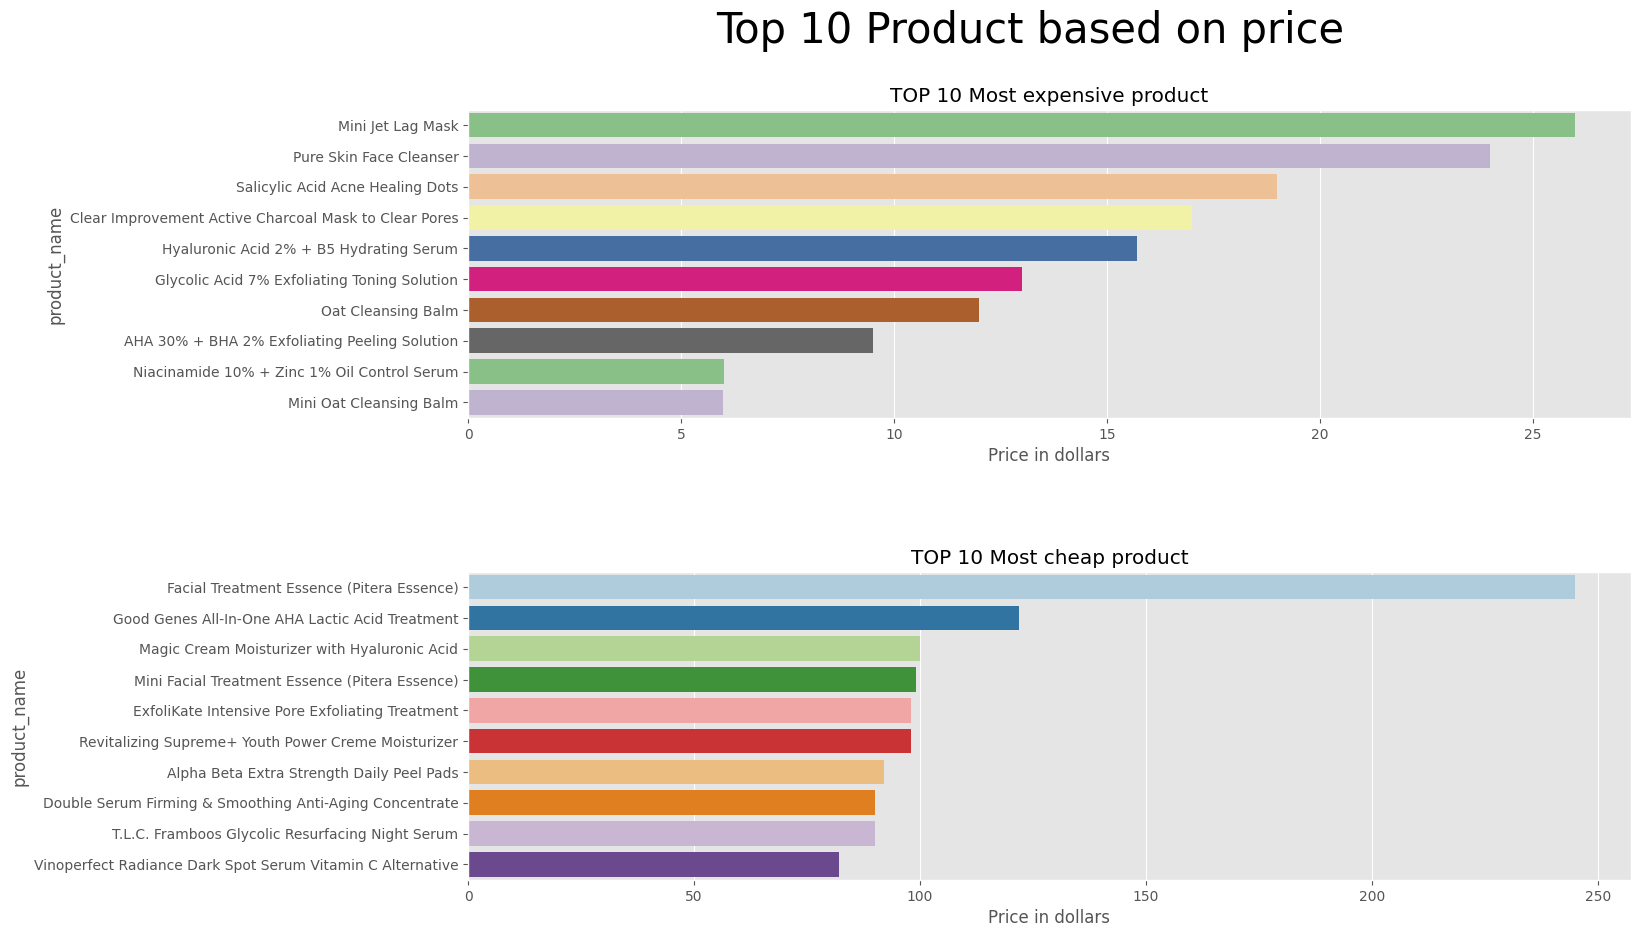

In [ ]:
# TOP 10 PRODUCTS BASED ON PRICE
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(15, 10))
fig.subplots_adjust(hspace=0.5)

# Most expensive products
most_expensive = df.groupby(['product_id', 'product_name', 'price_usd']).sum(numeric_only=True).reset_index() \
    .sort_values('price_usd', ascending=True).head(10).sort_values('price_usd', ascending=False)
sns.barplot(data=most_expensive, x='price_usd', y='product_name', ax=ax1, hue='product_name', palette='Accent', legend=False)
ax1.set_title("TOP 10 Most expensive product")
ax1.set_xlabel("Price in dollars")

# Cheapest products
cheapest = df.groupby(['product_id', 'product_name', 'price_usd']).sum(numeric_only=True).reset_index() \
    .sort_values('price_usd', ascending=False).head(10)
sns.barplot(data=cheapest, x='price_usd', y='product_name', ax=ax2, hue='product_name', palette='Paired', legend=False)
ax2.set_title("TOP 10 Most cheap product")
ax2.set_xlabel("Price in dollars")

# Overall title
plt.suptitle("Top 10 Product based on price", fontsize=30)

# Show the plot
plt.show()


The graph shows the top 10 most expensive and cheapest products based on their price.

### Insights:
1. **Most Expensive Products**:
   - The "Mini Jet Lag Mask" and "Pure Skin Face Cleanser" are the most expensive products in the top 10 list, each priced significantly higher than others.
   - Other products like the "Salicylic Acid Acne Healing Dots" and "Clear Improvement Active Charcoal Mask" are also among the costliest.

2. **Most Affordable Products**:
   - The "Facial Treatment Essence (Pitera Essence)" is the cheapest product, with a price significantly lower than other products on the list.
   - Other affordable options include the "Good Genes All-In-One AHA Lactic Acid Treatment" and "Magic Cream Moisturizer with Hyaluronic Acid," which are relatively lower priced.

### Summary:
The top 10 most expensive products are led by the "Mini Jet Lag Mask" and "Pure Skin Face Cleanser," while the "Facial Treatment Essence" stands out as the most affordable product, significantly cheaper than the others.

Text(0.5, 0.98, 'Most reccomended product for each skin types')

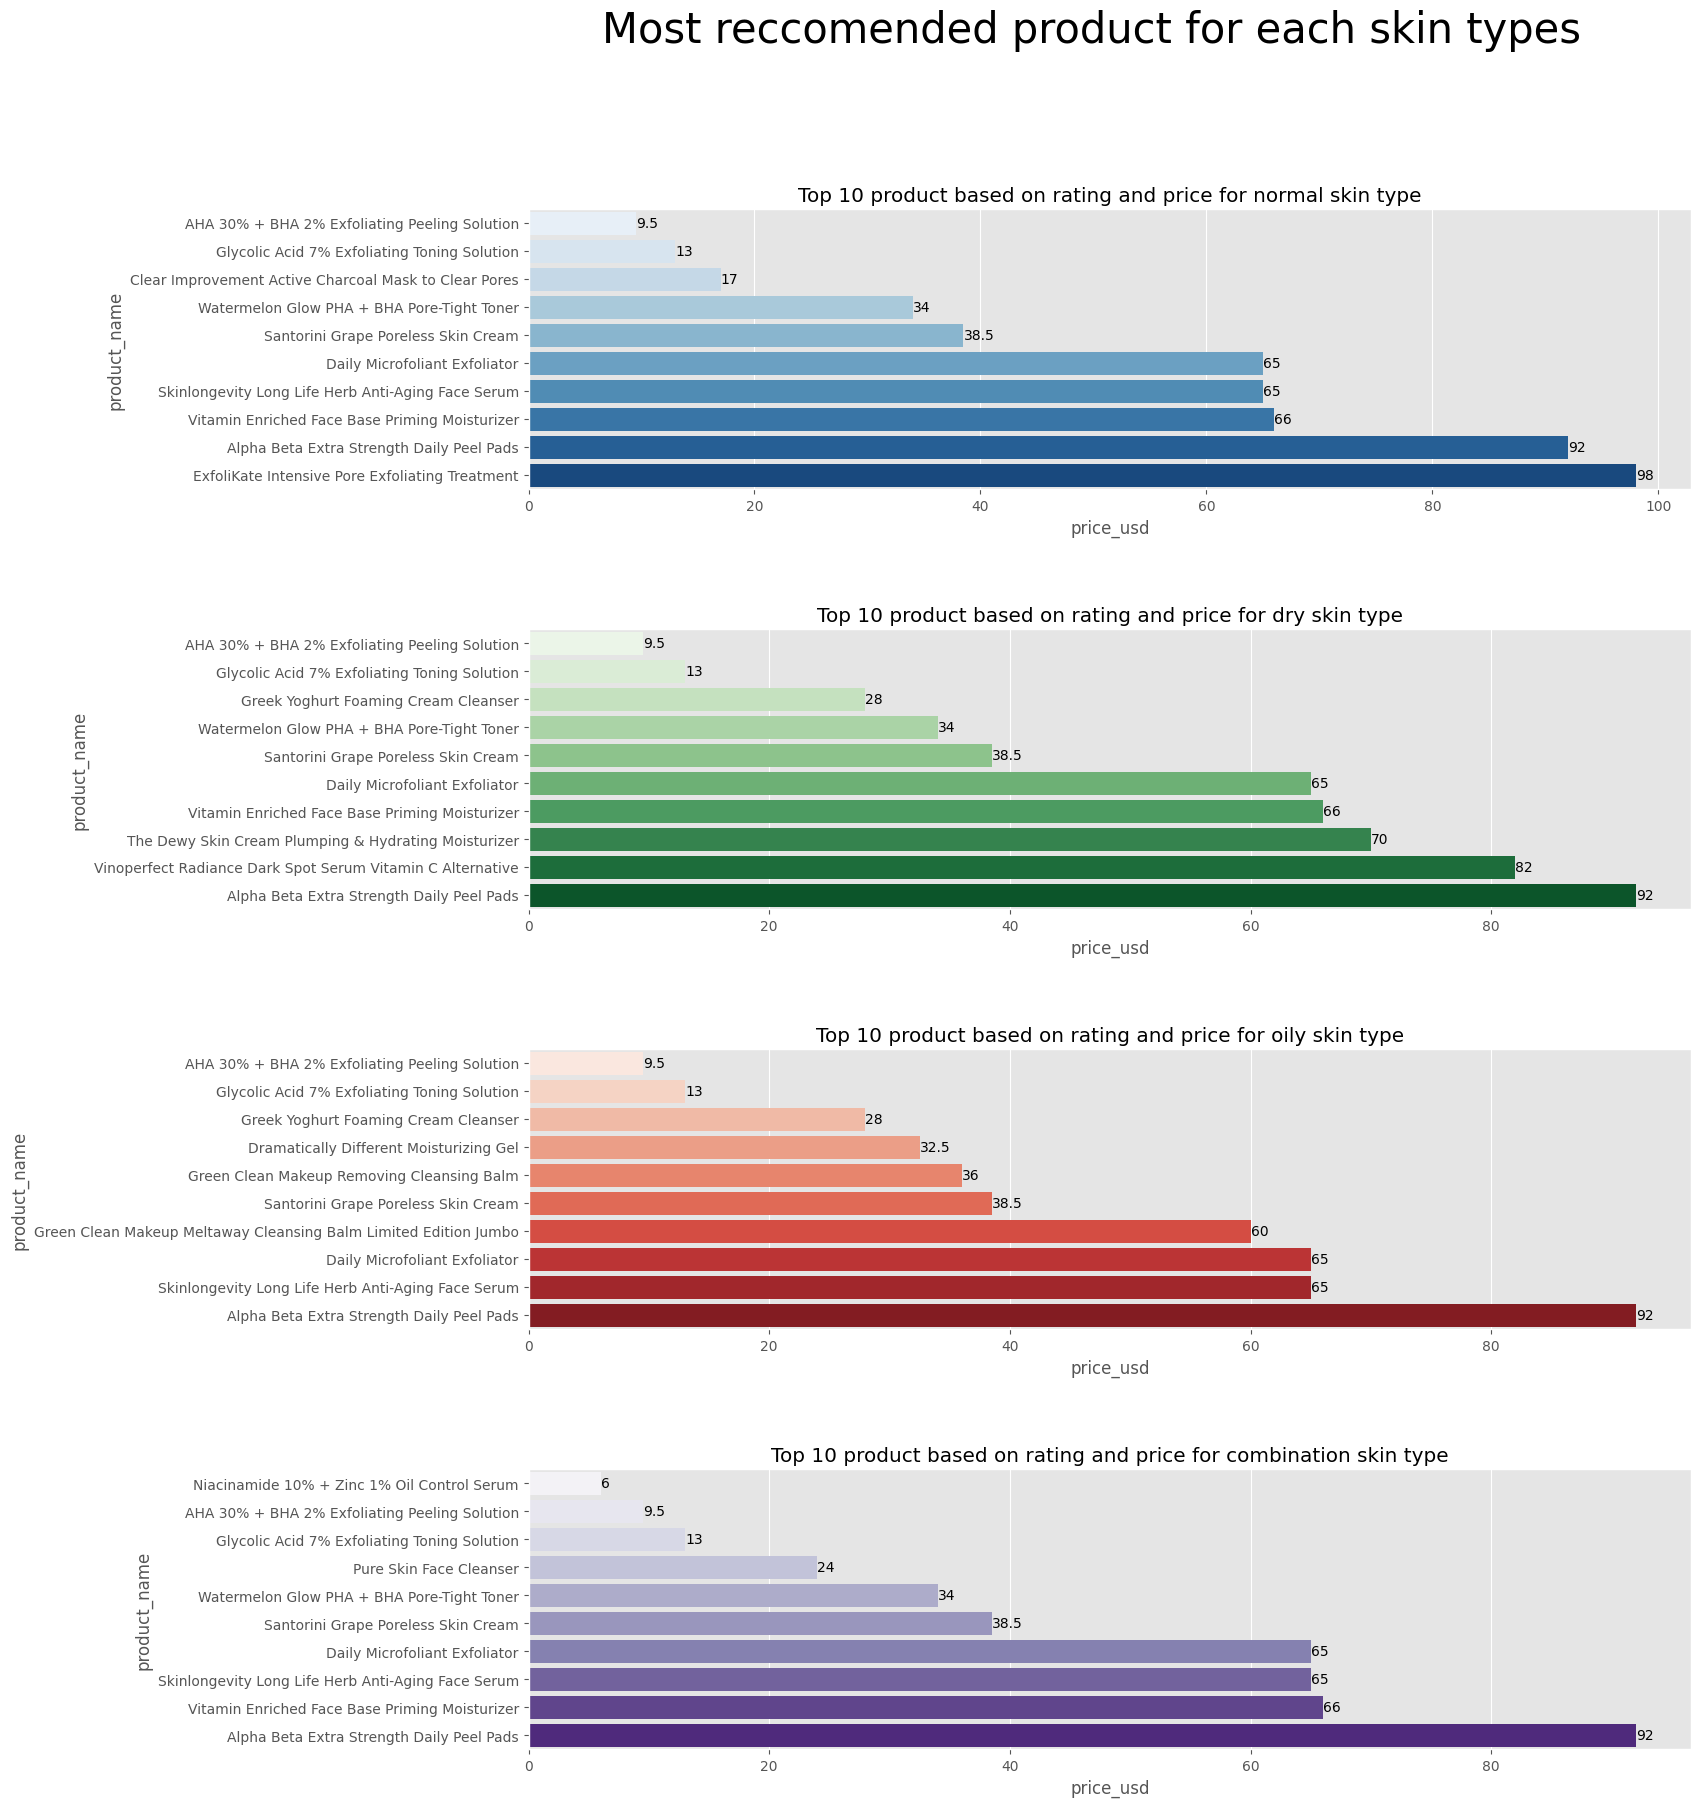

In [ ]:
# Most reccomended product for each skin_type
fig, (ax1,ax2,ax3,ax4) = plt.subplots(nrows=4,ncols=1,figsize= (15,20))
fig.subplots_adjust(hspace=0.5)

product_skin = df.groupby(['skin_type','product_id','product_name','price_usd']).mean(numeric_only=True)['rating'].reset_index()\
.sort_values('rating',ascending=False)

normal_skin = product_skin[product_skin['skin_type'] == 'normal'].sort_values('price_usd',ascending=True)\
.sort_values(['rating'],ascending=False).head(10)\
.sort_values('price_usd',ascending=True)
ax1 = sns.barplot(normal_skin,x='price_usd',y='product_name',ax=ax1, hue='product_name', palette='Blues', legend=False)
ax1.set_title("Top 10 product based on rating and price for normal skin type")
for i in ax1.containers:
    ax1.bar_label(i)

dry_skin = product_skin[product_skin['skin_type'] == 'dry'].sort_values('price_usd',ascending=True)\
.sort_values(['rating'],ascending=False).head(10)\
.sort_values('price_usd',ascending=True)
ax2 = sns.barplot(dry_skin,x='price_usd',y='product_name',ax=ax2, hue='product_name', palette='Greens', legend=False)
ax2.set_title("Top 10 product based on rating and price for dry skin type")
for i in ax2.containers:
    ax2.bar_label(i)

oily_skin = product_skin[product_skin['skin_type'] == 'oily'].sort_values('price_usd',ascending=True)\
.sort_values(['rating'],ascending=False).head(10)\
.sort_values('price_usd',ascending=True)
ax3 = sns.barplot(oily_skin,x='price_usd',y='product_name',ax=ax3,hue='product_name', palette='Reds', legend=False)
ax3.set_title("Top 10 product based on rating and price for oily skin type")
for i in ax3.containers:
    ax3.bar_label(i)

combination_skin = product_skin[product_skin['skin_type'] == 'combination'].sort_values('price_usd',ascending=True)\
.sort_values(['rating'],ascending=False).head(10)\
.sort_values('price_usd',ascending=True)
ax4 = sns.barplot(combination_skin,x='price_usd',y='product_name',ax=ax4, hue='product_name', palette='Purples', legend=False)
ax4.set_title("Top 10 product based on rating and price for combination skin type")
for i in ax4.containers:
    ax4.bar_label(i)


fig.suptitle("Most reccomended product for each skin types",fontsize=30)

The graph displays the most recommended products for different skin types (normal, dry, oily, and combination) based on rating and price.

The "AHA 30% + BHA 2% Exfoliating Peeling Solution" consistently ranks as a top-rated and affordable product across multiple skin types. For combination skin, the "Niacinamide 10% + Zinc 1% Oil Control Serum" is particularly recommended. Across all skin types, a range of both budget-friendly and premium products are well-regarded.

<Axes: xlabel='loves_count', ylabel='price_usd'>

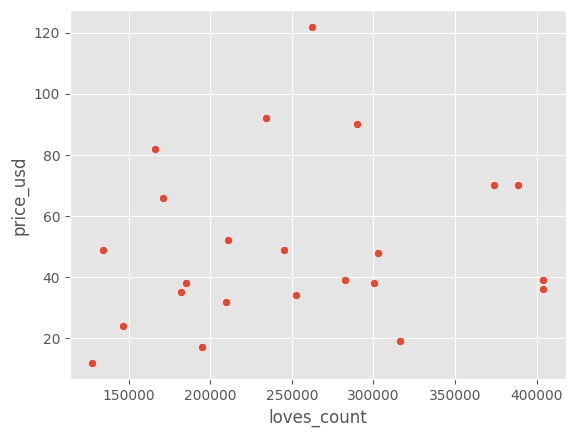

In [ ]:
# Lets see the relationship between loves_count and the price_usd of the product
def remove_outliers(data, lower_quantile=0.25, upper_quantile=0.75):
    lower_bound = np.quantile(data, lower_quantile)
    upper_bound = np.quantile(data, upper_quantile)
    cleaned_data = data[(data >= lower_bound) & (data <= upper_bound)]
    return cleaned_data
# Remove outliers using quantiles (5th percentile to 95th percentile)
cleaned_data = remove_outliers(df['loves_count'], lower_quantile=0.25, upper_quantile=0.75)

sns.scatterplot(df,x = cleaned_data,y=df['price_usd'])

The scatter plot displays the relationship between the number of "loves" a product has received (`loves_count`) and its price (`price_usd`).

There is no clear, strong correlation between the number of loves a product receives and its price. Products with a wide range of prices, from low to high, have received a similar number of loves, suggesting that both affordable and expensive products can be equally loved by customers.

<Axes: xlabel='is_recommended', ylabel='helpfulness'>

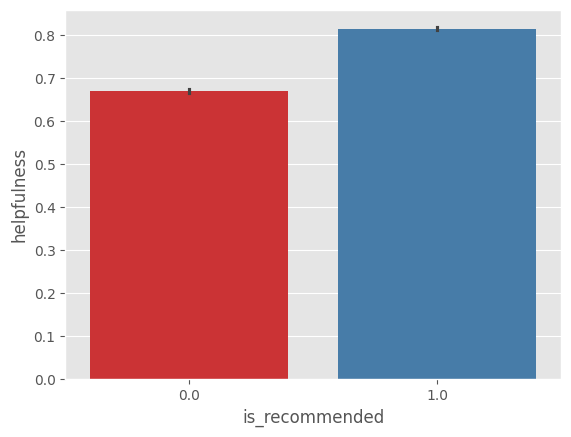

In [ ]:
# Lets see is higher the is_recommended score also higher of helpfulness the product
sns.barplot(df,y = df['helpfulness'],x=df['is_recommended'], hue= df['is_recommended'], palette='Set1', legend=False)

The bar chart compares the helpfulness of products that are recommended (`is_recommended = 1.0`) versus those that are not recommended (`is_recommended = 0.0`).

Products that are recommended tend to have higher helpfulness ratings compared to those that are not recommended. This suggests that products deemed helpful by users are more likely to be recommended to others.

Heatmap


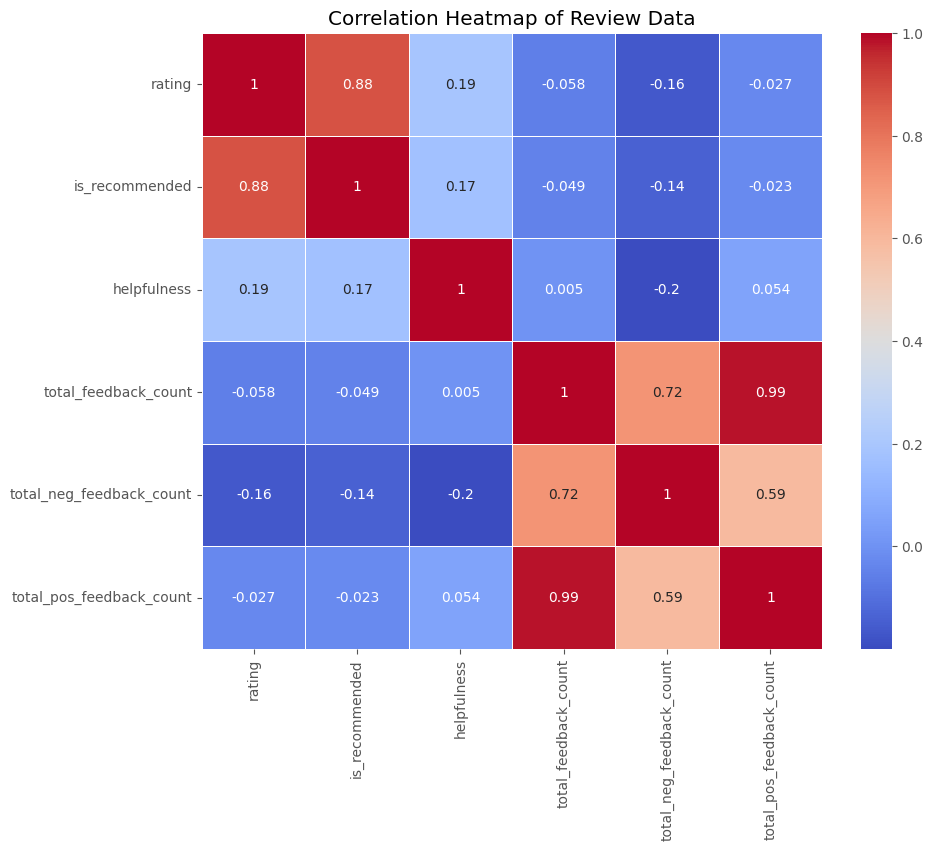

In [24]:
# Selecting relevant columns
columns = ['rating', 'is_recommended', 'helpfulness', 'total_feedback_count',
           'total_neg_feedback_count', 'total_pos_feedback_count']
df_selected = df[columns]

# Calculating the correlation matrix
corr_matrix = df_selected.corr()

# Set the size of the heatmap
plt.figure(figsize=(10, 8))

# Create the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Set the title
plt.title('Correlation Heatmap of Review Data')

# Display the plot
plt.show()



- **Rating & Recommendation**: Strong positive correlation (0.88).
- **Feedback Counts**: `total_feedback_count` highly correlates with `total_pos_feedback_count` (0.99); moderate with `total_neg_feedback_count` (0.72).
- **Helpfulness**: Low correlation with other features, suggesting it's mostly independent.

In [ ]:
# DROP ROWS WITH MISSING VALUES
df.dropna(axis=0,inplace=True)
df.drop(columns=['submission_time'], axis=1, inplace=True)


In [ ]:

categorical_columns = ['skin_tone', 'eye_color', 'hair_color', 'primary_category',
                       'secondary_category', 'size', 'tertiary_category',
                       'variation_type', 'variation_value', 'skin_type', 'dayofweek']


In [ ]:
# Check which columns are available
print(df.columns)



Index(['author_id', 'rating', 'is_recommended', 'helpfulness',
       'total_feedback_count', 'total_neg_feedback_count',
       'total_pos_feedback_count', 'review_text', 'skin_tone', 'eye_color',
       'skin_type', 'hair_color', 'product_id', 'product_name', 'brand_name',
       'price_usd', 'brand_id', 'child_count', 'highlights', 'ingredients',
       'limited_edition', 'loves_count', 'new', 'online_only', 'out_of_stock',
       'primary_category', 'reviews', 'secondary_category',
       'sephora_exclusive', 'size', 'tertiary_category', 'variation_type',
       'variation_value', 'year', 'month', 'day', 'weekday', 'dayofweek'],
      dtype='object')


In [ ]:
# Update categorical_columns based on available columns
categorical_columns = [col for col in categorical_columns if col in df.columns]

# One-hot encode the categorical variables
df = pd.get_dummies(df, columns=categorical_columns)

In [ ]:
# Scaling numerical features
scaler = StandardScaler()
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

In [ ]:
# Feature Selection
X = df.drop(columns=['author_id', 'review_text', 'product_id', 'rating', 'highlights', 'ingredients',
                     'product_name', 'brand_name'])
y = df['rating']

In [ ]:
# Splitting Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Define a function to create the model with dropout_rate parameter
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42)
}

In [ ]:
# Initializing a dictionary to store the results
results = {}

In [ ]:
# Training each model and evaluating its performance
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[model_name] = {'MSE': mse, 'R2': r2}
    print(f"{model_name} - MSE: {mse}, R2: {r2}")

X_train_sample, _, y_train_sample, _ = train_test_split(X_train, y_train, test_size=0.9, random_state=42)


Linear Regression - MSE: 0.21237340374945388, R2: 0.787056412913649
Decision Tree - MSE: 0.3521575412523595, R2: 0.6468969808373197
Random Forest - MSE: 0.18520195437687936, R2: 0.814300812605793


In [ ]:
# Use a larger portion of the dataset for tuning
X_train_sample, _, y_train_sample, _ = train_test_split(X_train, y_train, test_size=0.5, random_state=42)

# Expand the parameter grid for Random Forest
param_dist_rf = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20,  None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

# Initializing the RandomizedSearchCV object for Random Forest with more folds
random_search_rf = RandomizedSearchCV(RandomForestRegressor(random_state=42),
                                      param_distributions=param_dist_rf,
                                      n_iter=20,  # Number of parameter settings that are sampled
                                      cv=3,  # Increase number of folds
                                      scoring='neg_mean_squared_error',
                                      n_jobs=-1,
                                      random_state=42)

# Fit the model
random_search_rf.fit(X_train_sample, y_train_sample)

# Get the best model
best_rf_model = random_search_rf.best_estimator_

# Predict with the best model
y_pred_best_rf = best_rf_model.predict(X_test)
mse_best_rf = mean_squared_error(y_test, y_pred_best_rf)
r2_best_rf = r2_score(y_test, y_pred_best_rf)

print(f"Best Random Forest - MSE: {mse_best_rf}, R2: {r2_best_rf}")


Best Random Forest - MSE: 0.23553361339909326, R2: 0.7638340223817139


In [ ]:
# Defining the parameter grid for Decision Tree
param_grid_dt = {
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': [None, 'sqrt']
}

In [ ]:
# Initializing the GridSearchCV object for Decision Tree
grid_search_dt = GridSearchCV(DecisionTreeRegressor(random_state=42),
                              param_grid_dt,
                              cv=3,
                              scoring='neg_mean_squared_error',
                              n_jobs=1)  # Disable parallel processing for debugging

In [ ]:
# Fit the model
grid_search_dt.fit(X_train_sample, y_train_sample)

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(random_state=42), n_jobs=1,
             param_grid={'max_depth': [None, 10, 20],
                         'max_features': [None, 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5]},
             scoring='neg_mean_squared_error')

In [ ]:
# Get the best model
best_dt_model = grid_search_dt.best_estimator_

In [ ]:
# Predict with the best model
y_pred_best_dt = best_dt_model.predict(X_test)
mse_best_dt = mean_squared_error(y_test, y_pred_best_dt)
r2_best_dt = r2_score(y_test, y_pred_best_dt)

print(f"Best Decision Tree - MSE: {mse_best_dt}, R2: {r2_best_dt}")

Best Decision Tree - MSE: 0.27505024025167707, R2: 0.7242113006897392


In [ ]:
from tensorflow.keras.optimizers import Adam

def build_ann(input_shape):
 model = Sequential()
 model.add(Dense(64, activation='relu', input_shape=(input_shape,)))
 model.add(Dropout(0.2))
 model.add(Dense(32, activation='relu'))
 model.add(Dense(1))
 model.compile(optimizer=Adam(learning_rate=0.0001), loss='mse')
 return model

In [ ]:
# Build and train the ANN model
input_shape = X_train.shape[1]
ann_model = build_ann(input_shape)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = ann_model.fit(X_train, y_train, validation_split=0.2, epochs=150, batch_size=128, callbacks=[early_stopping], verbose=1)

Epoch 1/150
343/343 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 2904.4258 - val_loss: 55.9879
Epoch 2/150
343/343 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 461.0320 - val_loss: 1.0927
Epoch 3/150
343/343 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 192.5316 - val_loss: 3.5767
Epoch 4/150
343/343 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 90.0931 - val_loss: 2.1823
Epoch 5/150
343/343 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 40.5782 - val_loss: 1.5162
Epoch 6/150
343/343 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 22.5663 - val_loss: 1.0061
Epoch 7/150
343/343 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 15.0831 - val_loss: 1.0209
Epoch 8/150
343/343 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 10.3730 - val_loss: 1.0951
Epoch 9/150
343/343 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7.9958 - val_loss: 1.0004
Epoch 10/150
343/343 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6.7688 - val_loss: 1.0128
Epoch 11/150
343/343 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.2659 - val_loss: 0.9980
Epoch 12/150
343/343 ━━━━━━━

In [ ]:
# Evaluate the model
y_pred_ann = ann_model.predict(X_test)
mse_ann = mean_squared_error(y_test, y_pred_ann)
r2_ann = r2_score(y_test, y_pred_ann)
print(f"ANN Model - MSE: {mse_ann}, R2: {r2_ann}")

429/429 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
ANN Model - MSE: 0.2354185012098477, R2: 0.7639494436259119


In [25]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [26]:
import nbformat
from nbconvert import HTMLExporter
from google.colab import drive

# Defining the paths
notebook_file_path = '/content/drive/MyDrive/Colab Notebooks/sephora-1.ipynb'
output_html_file_path = '/content/drive/MyDrive/Colab Notebooks/sephora-1.html'

try:
    # Loading the notebook
    with open(notebook_file_path) as f:
        nb = nbformat.read(f, as_version=4)

    # Converting the notebook to HTML
    html_exporter = HTMLExporter()
    (body, resources) = html_exporter.from_notebook_node(nb)

    # Writing the HTML output to a file
    with open(output_html_file_path, 'w') as f:
        f.write(body)

    print(f"Notebook converted to HTML and saved to {output_html_file_path}")

except FileNotFoundError as e:
    print(f"Error: {e}")
    print("Please check the notebook file path and ensure the file exists.")



Notebook converted to HTML and saved to /content/drive/MyDrive/Colab Notebooks/sephora-1.html
